In [1]:
import os
import string

# Define the directory
dir_path = 'C:/Ahmed/Education/Grad_project/kaggle_asl/dataset'

# Get the list of folder names
folders = os.listdir(dir_path)

# Ensure we only deal with folders and sort them numerically
folders = sorted([f for f in folders if os.path.isdir(os.path.join(dir_path, f))], key=int)

# Define the new names: A-Z and 'space'
new_names = list(string.ascii_uppercase) + ['space']

# Check if we have the expected number of folders
if len(folders) != 27:
    raise ValueError("Expected 27 folders, but found {}".format(len(folders)))

# Rename the folders
for old_name, new_name in zip(folders, new_names):
    old_path = os.path.join(dir_path, old_name)
    new_path = os.path.join(dir_path, new_name)
    os.rename(old_path, new_path)
    print(f'Renamed {old_path} to {new_path}')


Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\0 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\A
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\1 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\B
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\2 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\C
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\3 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\D
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\4 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\E
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\5 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\F
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\6 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\G
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\7 to C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\H
Renamed C:/Ahmed/Education/Grad_project/kaggle_asl/dataset\8 to 

In [ ]:
import cv2
import mediapipe as mp
import os
import csv

# Initialize Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Define the dataset directory
dataset_dir = 'E:/ASL_Papers/Khairis_Model/dataset'
output_csv = 'hand_keypoints.csv'

# Open the CSV file for writing
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    header = ['folder', 'filename']
    for i in range(21):
        header.extend([f'x{i}', f'y{i}'])
    writer.writerow(header)
    
    # Loop through each folder
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        if os.path.isdir(folder_path):
            # Loop through each image in the folder
            for filename in os.listdir(folder_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(folder_path, filename)
                    
                    # Read the image
                    image = cv2.imread(file_path)
                    if image is None:
                        continue
                    
                    # Convert the BGR image to RGB
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Process the image and find hands
                    results = hands.process(image_rgb)
                    
                    if results.multi_hand_landmarks:
                        # Get the first hand detected (if multiple are detected)
                        hand_landmarks = results.multi_hand_landmarks[0]
                        
                        # Extract the x, y coordinates
                        row = [folder, filename]
                        for landmark in hand_landmarks.landmark:
                            row.extend([landmark.x, landmark.y])
                        
                        # Write the row to the CSV
                        writer.writerow(row)

# Release Mediapipe resources
hands.close()

print(f'Keypoints extraction completed. Data saved to {output_csv}')


In [2]:
import cv2
import mediapipe as mp
import os
import csv
import math

# Initialize Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Define the dataset directory
dataset_dir = 'C:\Ahmed\Education\Grad_project\kaggle_asl\dataset'
output_csv = 'hand_keypoints_normalized.csv'

def calculate_scale_factor(landmark1, landmark2):
    # Calculate the Euclidean distance between two landmarks (x, y only)
    x1, y1 = landmark1
    x2, y2 = landmark2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def normalize_landmarks(landmarks, reference_point_index=0, distance_point_index=12):
    # Identify the reference point (e.g., wrist)
    ref_x, ref_y = landmarks[reference_point_index]
    
    # Calculate the scale factor using the distance between the reference point and the distance point
    distance_point = landmarks[distance_point_index]
    scale_factor = calculate_scale_factor(landmarks[reference_point_index], distance_point)
    
    # Subtract the reference point coordinates and normalize by the scale factor
    normalized_landmarks = [
        ((x - ref_x) / scale_factor, (y - ref_y) / scale_factor)
        for (x, y) in landmarks
    ]
    
    return normalized_landmarks

# Open the CSV file for writing
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    header = ['folder', 'filename']
    for i in range(21):
        header.extend([f'x{i}', f'y{i}'])
    writer.writerow(header)
    
    # Loop through each folder
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        if os.path.isdir(folder_path):
            # Loop through each image in the folder
            for filename in os.listdir(folder_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(folder_path, filename)
                    
                    # Read the image
                    image = cv2.imread(file_path)
                    if image is None:
                        continue
                    
                    # Convert the BGR image to RGB
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Process the image and find hands
                    results = hands.process(image_rgb)
                    
                    if results.multi_hand_landmarks:
                        # Get the first hand detected (if multiple are detected)
                        hand_landmarks = results.multi_hand_landmarks[0]
                        
                        # Extract the x, y coordinates
                        landmarks = [(lm.x, lm.y) for lm in hand_landmarks.landmark]
                        
                        # Normalize the landmarks
                        normalized_landmarks = normalize_landmarks(landmarks)
                        
                        # Prepare the row with normalized coordinates
                        row = [folder, filename]
                        for landmark in normalized_landmarks:
                            row.extend([landmark[0], landmark[1]])
                        
                        # Write the row to the CSV
                        writer.writerow(row)

# Release Mediapipe resources
hands.close()

print(f'Keypoints extraction and normalization completed. Data saved to {output_csv}')



Keypoints extraction and normalization completed. Data saved to hand_keypoints_normalized.csv


Accuracy: 99.63%
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      1.00      1.00        99
           D       1.00      1.00      1.00       100
           E       0.98      1.00      0.99       100
           F       1.00      1.00      1.00       100
           G       1.00      0.98      0.99       100
           H       1.00      1.00      1.00       100
           I       0.98      1.00      0.99       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00        99
           L       1.00      1.00      1.00       100
           M       0.99      1.00      1.00       100
           N       1.00      0.97      0.98       100
           O       1.00      0.98      0.99       100
           P       0.98      1.00      0.99       100
           Q       1.00      1.00      1.00        93
          

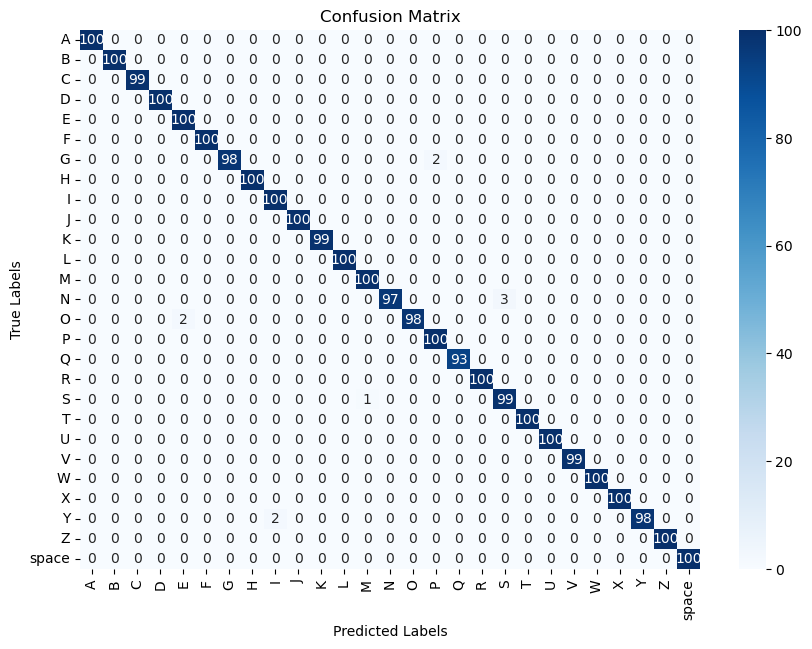

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

# Load the CSV file
csv_file = 'hand_keypoints.csv'
data = pd.read_csv(csv_file)

# Preprocess the data
# Extract features (all columns except 'folder' and 'filename')
X = data.drop(columns=['folder', 'filename'])

# Extract labels (the 'folder' column)
y = data['folder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 99.63%
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      1.00      1.00        99
           D       1.00      1.00      1.00       100
           E       0.98      1.00      0.99       100
           F       1.00      1.00      1.00       100
           G       1.00      0.98      0.99       100
           H       1.00      1.00      1.00       100
           I       0.98      1.00      0.99       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00        99
           L       1.00      1.00      1.00       100
           M       0.99      1.00      1.00       100
           N       1.00      0.97      0.98       100
           O       1.00      0.98      0.99       100
           P       0.98      1.00      0.99       100
           Q       1.00      1.00      1.00        93
          

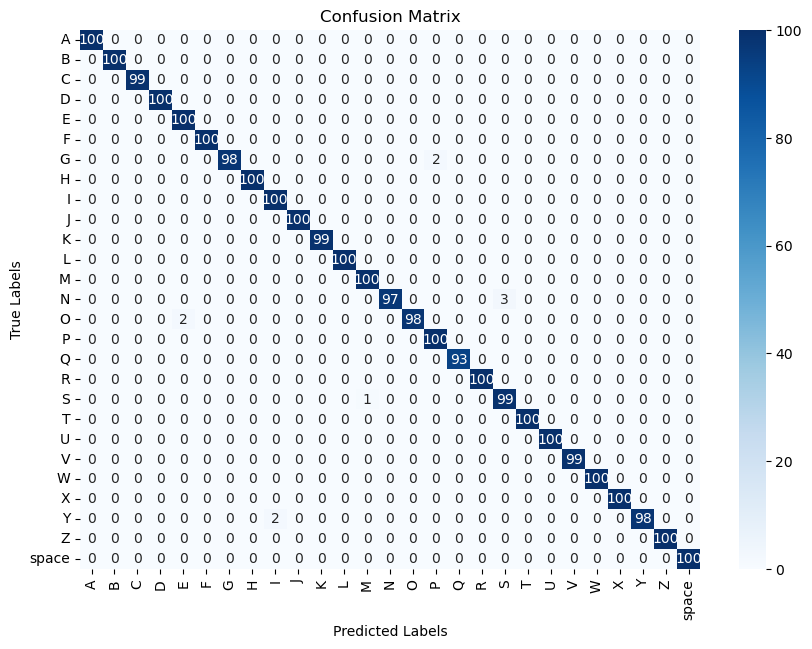

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# Load the CSV file
csv_file = 'hand_keypoints.csv'
data = pd.read_csv(csv_file)

# Preprocess the data
# Extract features (all columns except 'folder' and 'filename')
X = data.drop(columns=['folder', 'filename'])

# Extract labels (the 'folder' column)
y = data['folder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 99.81%
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       100
           B       1.00      1.00      1.00       100
           C       1.00      1.00      1.00        99
           D       1.00      1.00      1.00       100
           E       1.00      0.99      0.99       100
           F       1.00      1.00      1.00       100
           G       1.00      1.00      1.00       100
           H       0.98      1.00      0.99       100
           I       1.00      1.00      1.00       100
           J       1.00      1.00      1.00       100
           K       1.00      1.00      1.00        99
           L       1.00      1.00      1.00       100
           M       0.99      1.00      1.00       100
           N       1.00      1.00      1.00       100
           O       0.99      1.00      1.00       100
           P       1.00      0.97      0.98       100
           Q       1.00      1.00      1.00        93
          

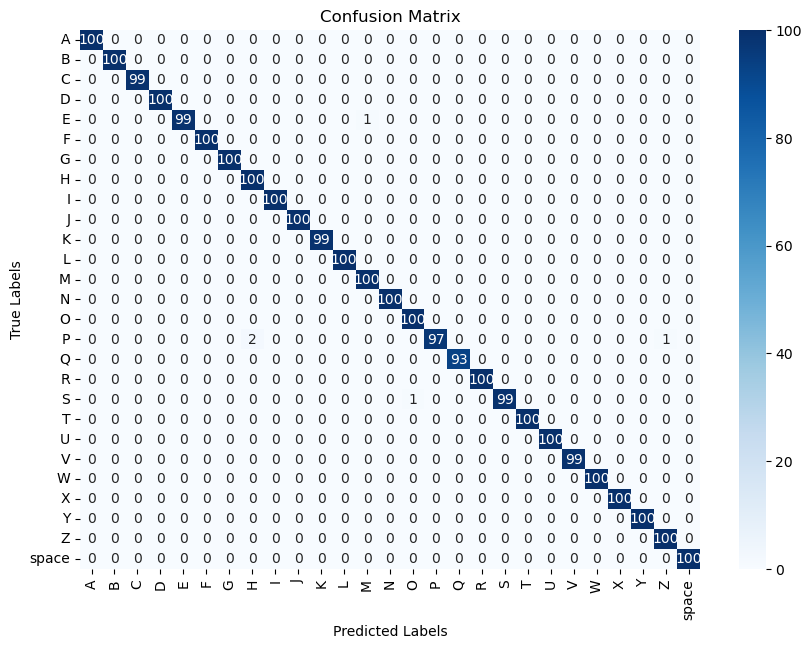

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# Load the CSV file
csv_file = 'hand_keypoints_normalized.csv'
data = pd.read_csv(csv_file)

# Preprocess the data
# Extract features (all columns except 'folder' and 'filename')
X = data.drop(columns=['folder', 'filename'])

# Extract labels (the 'folder' column)
y = data['folder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [3]:
# Check for NaN values
nan_values = data.isna().sum()

# Display NaN values
print("NaN values in the dataset:")
print(nan_values)

NaN values in the dataset:
folder      0
filename    0
x0          0
y0          0
x1          0
y1          0
x2          0
y2          0
x3          0
y3          0
x4          0
y4          0
x5          0
y5          0
x6          0
y6          0
x7          0
y7          0
x8          0
y8          0
x9          0
y9          0
x10         0
y10         0
x11         0
y11         0
x12         0
y12         0
x13         0
y13         0
x14         0
y14         0
x15         0
y15         0
x16         0
y16         0
x17         0
y17         0
x18         0
y18         0
x19         0
y19         0
x20         0
y20         0
dtype: int64


In [5]:
import joblib
import pickle
# Save the model to a file
model_filename = 'random_forest_asl_model.joblib'
joblib.dump(clf, model_filename)
#pickle.dump(clf,open (model_filename , 'wb'))
print(f'Model saved to {model_filename}')

Model saved to random_forest_asl_model.joblib


In [4]:
import joblib
import pickle
# Save the model to a file
model_filename = 'random_forest_asl_model_ref.joblib'
joblib.dump(clf, model_filename)
#pickle.dump(clf,open (model_filename , 'wb'))
print(f'Model saved to {model_filename}')

Model saved to random_forest_asl_model_ref.joblib


In [6]:
import cv2
import mediapipe as mp
import joblib
import numpy as np

# Load the trained model
model_filename = 'random_forest_asl_model.joblib'
clf = joblib.load(model_filename)

# Initialize Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Define function to process hand landmarks
def process_landmarks(landmarks):
    # Extract x and y coordinates
    row = []
    for landmark in landmarks:
        row.extend([landmark.x, landmark.y])
    return np.array(row).reshape(1, -1)

# Open webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    success, image = cap.read()
    if not success:
        break

    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    # Process the image and find hands
    results = hands.process(image_rgb)

    # Create a black background
    black_bg = np.zeros_like(image_rgb)

    # Draw hand landmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Process the landmarks
            landmarks = process_landmarks(hand_landmarks.landmark)

            scaled=scaler.transform(landmarks)

            # Predict the gesture
            gesture = clf.predict(scaled)[0]
            
            # Display the predicted gesture on the image
            cv2.putText(image, f'Gesture: {gesture}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display the image
    cv2.imshow('ASL Detection', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was

In [3]:
import cv2
import mediapipe as mp
import joblib
import numpy as np
import math

# Load the trained model
model_filename = 'random_forest_asl_model_ref.joblib'
clf = joblib.load(model_filename)

# Initialize Mediapipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

def calculate_scale_factor(landmark1, landmark2):
    # Calculate the Euclidean distance between two landmarks (x, y only)
    x1, y1 = landmark1
    x2, y2 = landmark2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def normalize_landmarks(landmarks, reference_point_index=0, distance_point_index=12):
    # Identify the reference point (e.g., wrist)
    ref_x, ref_y = landmarks[reference_point_index]
    
    # Calculate the scale factor using the distance between the reference point and the distance point
    distance_point = landmarks[distance_point_index]
    scale_factor = calculate_scale_factor(landmarks[reference_point_index], distance_point)
    
    # Subtract the reference point coordinates and normalize by the scale factor
    normalized_landmarks = [
        ((x - ref_x) / scale_factor, (y - ref_y) / scale_factor)
        for (x, y) in landmarks
    ]
    
    return normalized_landmarks

def prepare_input_for_model(normalized_landmarks):
    # Flatten the list of tuples into a single list
    return np.array([coord for landmark in normalized_landmarks for coord in landmark])

# Open webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    success, image = cap.read()
    if not success:
        break

    # Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process the image and find hands
    results = hands.process(image_rgb)

    # Draw hand landmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Extract the x, y coordinates
            landmarks = [(lm.x, lm.y) for lm in hand_landmarks.landmark]
            
            # Normalize the landmarks
            normalized_landmarks = normalize_landmarks(landmarks)
            
            # Prepare the input for the model
            model_input = prepare_input_for_model(normalized_landmarks).reshape(1, -1)
            
            # Predict the gesture
            gesture = clf.predict(model_input)[0]
            
            # Display the predicted gesture on the image
            cv2.putText(image, f'Gesture: {gesture}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display the image
    cv2.imshow('ASL Detection', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Release Mediapipe resources
hands.close()

c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Ahmed\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val